In [23]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from datetime import datetime
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [24]:
# Load model

nlp = spacy.load('en_core_web_md')

In [26]:
# Target Search Term
target_terms = ("@BBC", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# List to hold results
results_list = []
sentiments = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
target_list = []
tweet_date = []
text_list = []
f_compound_list = []
f_positive_list = []
f_negative_list = []
f_neutral_list = []
f_target_list = []
f_tweet_date = []
f_text_list = []
text_cnt = []
txt_cnt = 0


# Loop through all target users
for target in target_terms:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Loop through 5 times
    for x in range(1):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list - 

            text_cnt.append(txt_cnt)
            target_list.append(target)
            tweet_date.append(tweet["created_at"])
            text_list.append(tweet["text"])
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            txt_cnt +=1

        oldest_tweet = tweet["id"] - 1
        txt_cnt = 0
        


In [27]:
tweet_dict = {
    "Target": target_list,
    "Create_Date": tweet_date,
    "Text": text_list,
    "Compound": compound_list,
    "Positive": positive_list,
    "Negative": negative_list,
    "Neutral": neutral_list,
    "Text_Cnt": text_cnt
}

tweet_data = pd.DataFrame(tweet_dict)
print(len(tweet_data))
tweet_data.head()



# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
tweet_data.to_csv("tweet_data.csv", encoding="utf-8", index=False)

tweet_data.head()


500


,Target,Create_Date,Text,Compound,Positive,Negative,Neutral,Text_Cnt
0,@BBC,Fri Oct 05 00:37:29 +0000 2018,RT @BBC: This is how homophobia feels in 2018....,0.0,0.0,0.0,1.0,0
1,@BBC,Fri Oct 05 00:37:27 +0000 2018,RT @BBC: 🎶 @BTS_twt is the #KPop band taking o...,0.0,0.0,0.0,1.0,1
2,@BBC,Fri Oct 05 00:37:19 +0000 2018,RT @RealRapman: BBC 1 news @bbc #shirosstory 🙏...,0.0,0.0,0.0,1.0,2
3,@BBC,Fri Oct 05 00:37:18 +0000 2018,RT @BTS__Europe: Now officialy on the @BBC sch...,0.0,0.0,0.0,1.0,3
4,@BBC,Fri Oct 05 00:37:17 +0000 2018,RT @BTS__Europe: Now officialy on the @BBC sch...,0.0,0.0,0.0,1.0,4


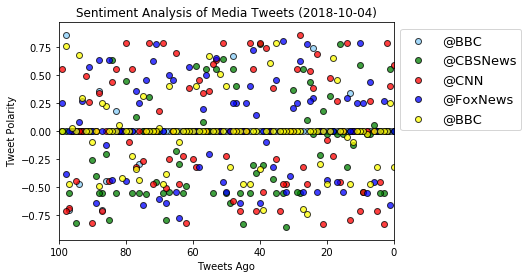

In [28]:

#colors = ['lightskyblue', 'green', 'red', 'blue', 'yellow']
#c_ind = 0
label_terms = ("@BBC", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

#for target in label_terms:
#    tweet_group = tweet_data[tweet_data["Target"] == target]
#    plt.scatter(tweet_group["Create_Date"], tweet_group["Compound"], marker="o", edgecolors="black", c=colors[c_ind],
#               label=target, alpha=0.75)
#    c_ind +=1

bbc = tweet_data.loc[tweet_data["Target"] == "@BBC"]
cbs = tweet_data.loc[tweet_data["Target"] == "@CBSNews"]
cnn = tweet_data.loc[tweet_data["Target"] == "@CNN"]
fox = tweet_data.loc[tweet_data["Target"] == "@FoxNews"]
nyt = tweet_data.loc[tweet_data["Target"] == "@nytimes"]

plt.scatter(bbc["Text_Cnt"], bbc["Compound"], marker="o", edgecolors="black", c='lightskyblue', label="@BBC", alpha=0.75)
plt.scatter(cbs["Text_Cnt"], cbs["Compound"], marker="o", edgecolors="black", c='green', label="@CBSNews", alpha=0.75)
plt.scatter(cnn["Text_Cnt"], cnn["Compound"], marker="o", edgecolors="black", c='red', label="@CNN", alpha=0.75)
plt.scatter(fox["Text_Cnt"], fox["Compound"], marker="o", edgecolors="black", c='blue', label="@FoxNews", alpha=0.75)
plt.scatter(nyt["Text_Cnt"], nyt["Compound"], marker="o", edgecolors="black", c='yellow', label="@BBC", alpha=0.75)

now = datetime.now()
now = now.strftime("%Y-%m-%d")
#plt.title(f"Sentiment Analysis of Media Tweets ({now})", frameon = True,bbox_to_anchor = (1,1),fontsize=13) 
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim(100,0)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(loc='best', frameon=True, bbox_to_anchor = (1,1),fontsize=13)
plt.savefig("News_scatter.png")
plt.show()

          Compound
Target            
@BBC      0.005239
@CBSNews -0.113240
@CNN      0.008039
@FoxNews  0.021681
@nytimes -0.019820


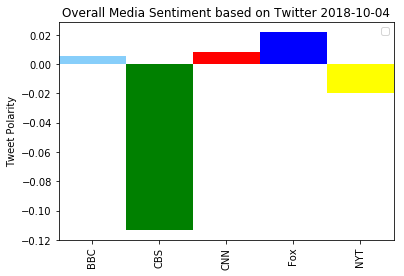

In [33]:

sentiment2 = tweet_data[['Target', 'Compound']]

sentiment_mean = sentiment2.groupby(['Target']).mean()
print(sentiment_mean)

sentiment_mean.plot.bar()

objects = ("BBC", "CBS", "CNN", "Fox", "NYT")
y_pos = np.arange(len(objects))
plt.bar(y_pos, sentiment_mean['Compound'], align='center', alpha=1, color=('lightskyblue', 'green', 'red', 'blue', 'yellow'),
       label='_', width=1)
plt.xticks(y_pos, objects)
plt.ylabel('Tweet Polarity')
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.xlabel('')
plt.legend('')
plt.title(f"Overall Media Sentiment based on Twitter {now}")
plt.savefig("News_bar.png")

plt.show()    
